### Load and clean subtitles text

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guilherme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import glob

ROOT_PATH = "../data/tratamento-precoce-top-200"
data = glob.glob(ROOT_PATH + "/relatedVideoSubtitles/*.pt.txt" )

len(data)

779

In [8]:
import text

subtitles = []

for f in data:
    with open(f) as file:
        cleaned = text.c(file.read())
        subtitles.append(cleaned)

### Subtitle example

In [10]:
print(subtitles[8])

chin dezembr estranh pneumon grav comec detect hospit pouc identific agent caus coronaviru dispar alert autoridad chin viru tinh potenc absurd torn pandem afinal tinh surt sarn tamb caus coronaviru imediat sistem vigilanc chin comec rastr pesso infect viru merc animal coraca apont porqu muit paci tinh pass diss merc orig coronaviru possi viru surg fazend criaca animal silvestr vend viru escap laboratori mesm morceg andress vide cont sobr orig coronaviru misteri aind permanec gost dess conteud inscrev canal acompanh ness missa divulg cienc form imparc populaca conteud conv entr noss canal telegr mater youtub fech enta vide algum temp cient martel coronaviru caus covid morceg simples morceg verdad corret porqu coronaviru circul human difer encontr morceg compartilh torn novent seil cent gelol signif dess morceg infect espirr hein estranh prova doent porqu viru identific agor protein spik infect celul human apes quer entr respost imun cont rapid dess infecca possibil morceg transmit viru 

## Kmeans Clustering

In [11]:
import numpy as np

from sklearn.decomposition import TruncatedSVD

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [12]:
tfidf = TfidfVectorizer(max_df=1.0, min_df=2, use_idf=True)
count = CountVectorizer(binary=True)
X_tfidf = tfidf.fit_transform(subtitles)
X_count = count.fit_transform(subtitles)

In [13]:
svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

In [14]:
L = lsa.fit_transform(X_tfidf)

In [15]:
from sklearn.cluster import KMeans

In [18]:
x = []
y = []
for k in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(L)
    x.append(k)
    y.append(km.inertia_)

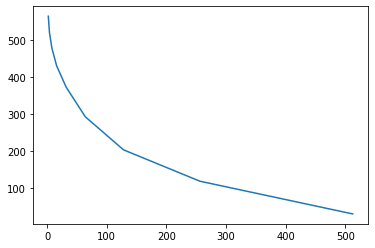

In [19]:
import matplotlib.pyplot as plt
plt.plot(x, y)

In [30]:
k = 8
km = KMeans(n_clusters=k, init='k-means++')
km.fit(L)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]

In [33]:
import pandas as pd
f = open(ROOT_PATH + "/notebooks/clustering.csv", "w")

terms = tfidf.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    where = np.where(km.labels_ == i)[0]
    print(len(where))
    for d in where:    
        videoId = data[d].split("/")[-1].split(".")[-3] 
        print(videoId)
        f.write(f"{videoId}, {i+1}\n") 
        #f.write(videoId + " ," + str(i))
    print()

f.close()

Cluster 0: viru medic enta pesso gent muit sintom trat doenc paci115
BgB-sXUjVOA
TFwMM4xi3o4
1eFiykKPTCE
rnaqu-GvPcA
CW4zYIxaI38
pS5AmSkze3I
U1oRnL_u2Ng
W8dRxfDKVzE
KJ4jUt37s4M
emEMQiwlWI0
qr8MpqrdDLQ
qYVc6cPmGF4
xd0MraU624g
IRCcFqceAF0
sBRRxAtZmlU
bj4Ab5Z1ykM
4uF8ffV0SkI
s2_fmGRvgEQ
ZjypAbvKd3k
QRCnMfpFb4k
hBmwjSMhgeg
97T9u-x6Zkg
7EahQMMFCAY
BMCXjRPXwvM
hhuOsWWGXCU
IFSOt06iJ1o
DFCxrNj-MQ8
NbRNo1kYub4
phQJExUmM7Y
Bvm6jGCzeRg
RsaZBew2nNw
sfXuDyWxgv8
Con_UIQdpmE
buvhFD4FepY
DZqfFoRR16k
KEdhyrv9rYM
wNHHvYRBaPE
jng04HZDo6Q
SLQZ3Iq_uWU
seCRmDHD-tM
O_zlrPCL1KA
BSwcqYQhZw8
BrvCeq1DWHM
zrqDcEqIFJ4
EG4HU-pDW1k
KTjCKXW_sGg
dSb1_LO-Z58
nE-Z9pBQXd8
AhcGoCyHKEU
3U2GnygxdBE
HQhmt3yxjgQ
vcZ8ZByfGsU
4sVBZVtxSLc
jzsOSxoJGLk
ejFjPWRT1f8
nMyXXrKhAoY
M4et8etFFws
J-h9D5r-hHc
3TipJWKx56Q
OUQ3G6cipVg
SlDQBY63xcc
CpZwhvvh43E
zxiXECN1zEM
qrHpyZ7dNtM
mQAidM3Ybdw
1IW8gxk1XVw
xgxzVeUi1tk
Vs4MWDJfxHI
31oTrNjCRG8
-URPBJ0Y4LI
t3XFarq6pPA
q5IH1A8GRzw
ec6XslfVSDE
9VoDc_962pk
IK48ndYUYJE
14IwLmFwVUA
eiyAzAWSQmU
LRsWGHW